In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import portpy_photon as pp
from low_dim_rt import LowDimRT
# %run ex_wavelet.py

In [3]:
# specify the patient data location
# you first need to download the patient database from the link provided in the PortPy GitHub page
data_dir = r'..\data'
# pick a patient from the existing patient list to get detailed info about the patient data (e.g., beams_dict, structures, ...)
patient_id = 'Lung_Patient_1'
# create my_plan object for the planner beams_dict and select among the beams which are 30 degrees apart
# for the customized beams_dict, you can pass the argument beam_ids
my_plan = pp.Plan(patient_id, data_dir)


Creating BEV..
Loading sparse influence matrix...
Done


In [4]:
# run IMRT fluence map optimization using a low dimensional subspace for fluence map compression
sol = pp.Optimize.run_IMRT_fluence_map_CVXPy(my_plan, solver='MOSEK', opt_params={'smoothness_weight': 10})

creating rinds of size [5, 5, 20, 30, 500] mm ..
rinds created!!
Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Mar 06 06:58:13 PM: Your problem has 67514 variables, 17 constraints, and 0 parameters.
(CVXPY) Mar 06 06:58:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 06 06:58:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 06 06:58:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 06

(CVXPY) Mar 06 06:59:25 PM: 20  5.9e-06  4.8e-03  4.8e-07  1.00e+00   9.237341141e+01   9.237277361e+01   2.6e-06  45.92 
(CVXPY) Mar 06 06:59:25 PM: 21  3.2e-06  3.2e-03  1.9e-07  1.00e+00   6.273583522e+01   6.273548455e+01   1.4e-06  46.56 
(CVXPY) Mar 06 06:59:26 PM: 22  1.5e-06  4.5e-03  6.1e-08  9.99e-01   4.395759914e+01   4.395743572e+01   6.5e-07  47.41 
(CVXPY) Mar 06 06:59:27 PM: 23  4.7e-07  5.0e-03  1.1e-08  9.96e-01   3.320142859e+01   3.320137550e+01   2.1e-07  48.62 
(CVXPY) Mar 06 06:59:28 PM: 24  2.8e-07  4.5e-03  5.0e-09  9.96e-01   3.132506683e+01   3.132503544e+01   1.2e-07  49.27 
(CVXPY) Mar 06 06:59:29 PM: 25  2.2e-07  6.6e-03  3.4e-09  9.97e-01   3.074595073e+01   3.074592615e+01   9.6e-08  49.94 
(CVXPY) Mar 06 06:59:30 PM: 26  6.5e-08  1.5e-02  5.7e-10  9.97e-01   2.930322543e+01   2.930321798e+01   2.9e-08  51.17 
(CVXPY) Mar 06 06:59:31 PM: 27  2.6e-08  6.0e-02  1.5e-10  9.99e-01   2.895122231e+01   2.895121930e+01   1.2e-08  51.81 
(CVXPY) Mar 06 06:59:31 

In [5]:
sol_low_dim = LowDimRT.run_IMRT_fluence_map_low_dim(my_plan, solver='MOSEK', opt_params={'smoothness_weight': 10})

Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Mar 06 07:02:09 PM: Your problem has 70645 variables, 23 constraints, and 0 parameters.
(CVXPY) Mar 06 07:02:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 06 07:02:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 06 07:02:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 06 07:02:09 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Ma

(CVXPY) Mar 06 07:05:41 PM: 21  6.6e-07  2.5e-03  1.8e-08  9.96e-01   3.669326757e+01   3.669319242e+01   2.9e-07  161.36
(CVXPY) Mar 06 07:05:45 PM: 22  4.5e-07  4.4e-03  1.0e-08  9.97e-01   3.460094741e+01   3.460089628e+01   2.0e-07  164.56
(CVXPY) Mar 06 07:05:48 PM: 23  2.7e-07  7.8e-03  4.9e-09  9.97e-01   3.288069933e+01   3.288066823e+01   1.2e-07  167.72
(CVXPY) Mar 06 07:05:51 PM: 24  1.5e-07  1.5e-02  2.0e-09  9.98e-01   3.172578332e+01   3.172576589e+01   6.8e-08  170.88
(CVXPY) Mar 06 07:05:54 PM: 25  8.9e-08  2.8e-02  9.2e-10  9.99e-01   3.112689611e+01   3.112688589e+01   4.0e-08  174.20
(CVXPY) Mar 06 07:05:58 PM: 26  7.9e-08  3.4e-02  7.6e-10  9.99e-01   3.102625024e+01   3.102624125e+01   3.5e-08  177.42
(CVXPY) Mar 06 07:06:02 PM: 27  1.4e-08  7.7e-02  5.4e-11  9.99e-01   3.042737130e+01   3.042736975e+01   6.0e-09  181.39
(CVXPY) Mar 06 07:06:05 PM: 28  4.4e-09  1.1e+00  1.8e-12  1.00e+00   3.032572950e+01   3.032572926e+01   8.4e-10  184.86
(CVXPY) Mar 06 07:06:09 

In [6]:
sol_low_dim_only = LowDimRT.run_IMRT_fluence_map_low_dim(my_plan, solver='MOSEK',
                                                         opt_params={'smoothness_weight': 0})

Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Mar 06 07:08:47 PM: Your problem has 70645 variables, 28 constraints, and 0 parameters.
(CVXPY) Mar 06 07:08:47 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 06 07:08:47 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 06 07:08:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 06 07:08:47 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Ma

(CVXPY) Mar 06 07:12:38 PM: 21  6.6e-07  1.4e-03  1.8e-08  9.96e-01   3.669326564e+01   3.669319049e+01   2.9e-07  172.97
(CVXPY) Mar 06 07:12:42 PM: 22  4.5e-07  3.0e-03  1.0e-08  9.97e-01   3.460094440e+01   3.460089326e+01   2.0e-07  177.33
(CVXPY) Mar 06 07:12:47 PM: 23  2.7e-07  5.1e-03  4.9e-09  9.97e-01   3.288069729e+01   3.288066619e+01   1.2e-07  181.61
(CVXPY) Mar 06 07:12:51 PM: 24  1.5e-07  7.3e-03  2.0e-09  9.98e-01   3.172578263e+01   3.172576520e+01   6.8e-08  185.94
(CVXPY) Mar 06 07:12:55 PM: 25  8.9e-08  1.6e-02  9.2e-10  9.99e-01   3.112689523e+01   3.112688502e+01   4.0e-08  190.16
(CVXPY) Mar 06 07:12:59 PM: 26  7.9e-08  2.1e-02  7.6e-10  9.99e-01   3.102624934e+01   3.102624035e+01   3.5e-08  194.33
(CVXPY) Mar 06 07:13:04 PM: 27  1.4e-08  4.0e-02  5.4e-11  9.99e-01   3.042737118e+01   3.042736963e+01   6.0e-09  199.34
(CVXPY) Mar 06 07:13:09 PM: 28  9.4e-09  6.7e-01  2.0e-12  1.00e+00   3.032572960e+01   3.032572936e+01   8.4e-10  203.88
(CVXPY) Mar 06 07:13:14 

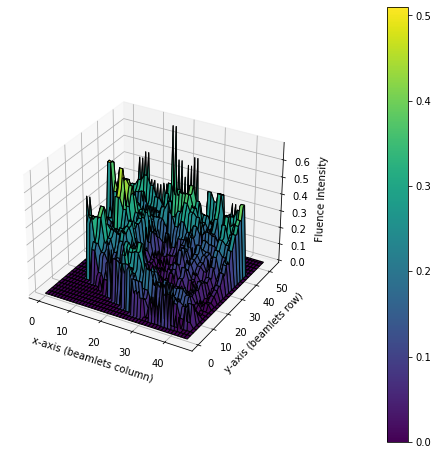

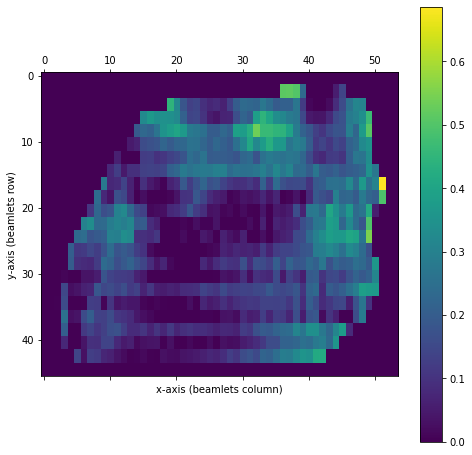

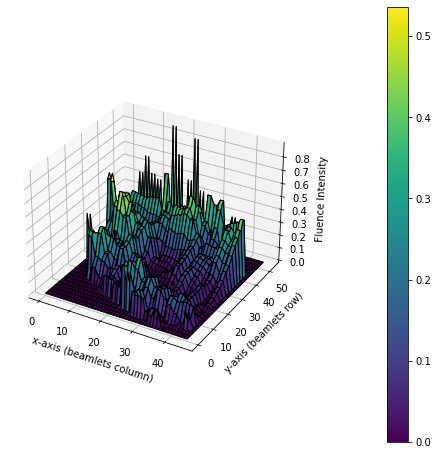

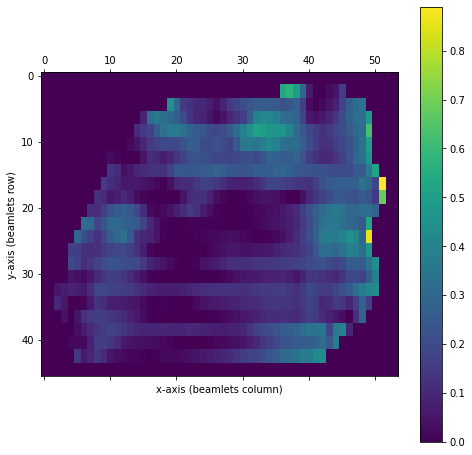

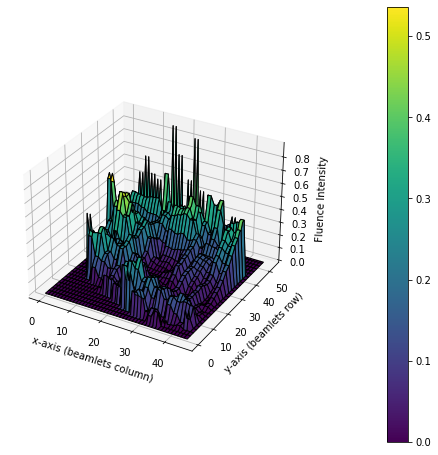

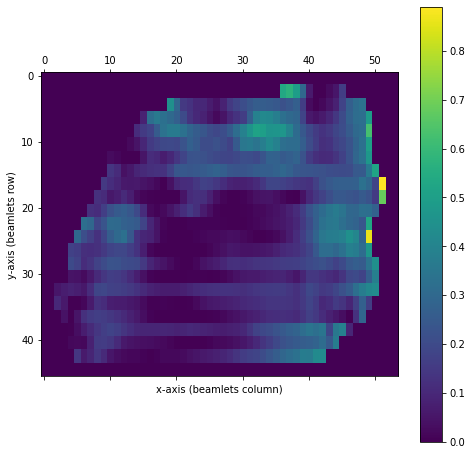

In [7]:
# plot fluence 3D and 2D
pp.Visualize.plot_fluence_3d(sol=sol, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol, beam_id=0)
pp.Visualize.plot_fluence_3d(sol=sol_low_dim, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol_low_dim, beam_id=0)
pp.Visualize.plot_fluence_3d(sol=sol_low_dim_only, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol_low_dim_only, beam_id=0)

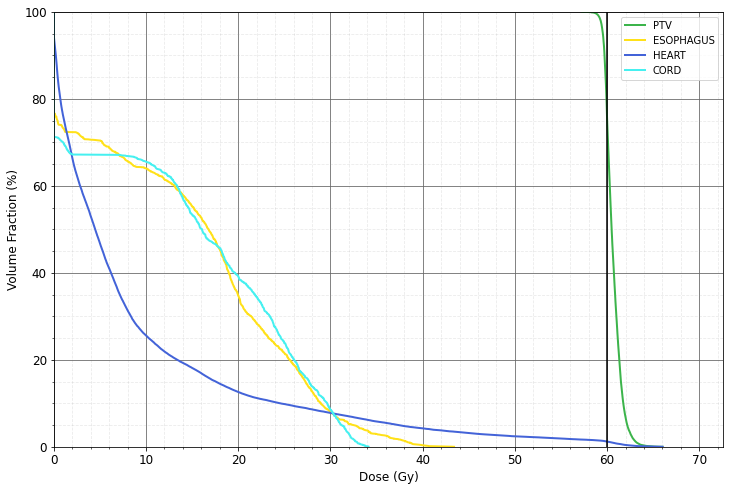

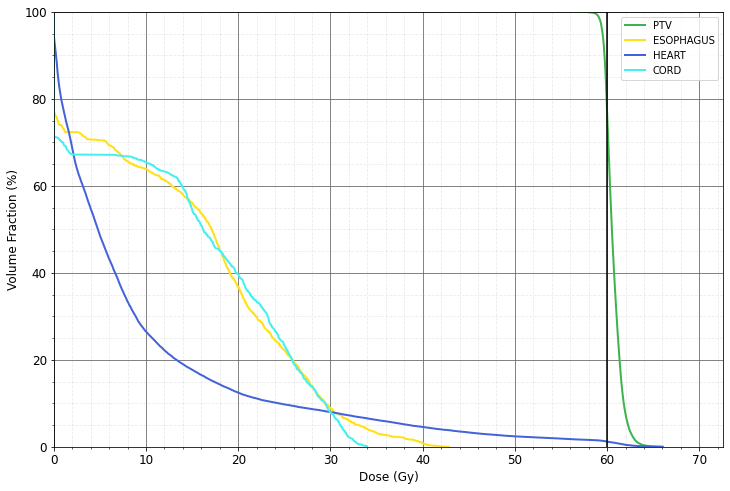

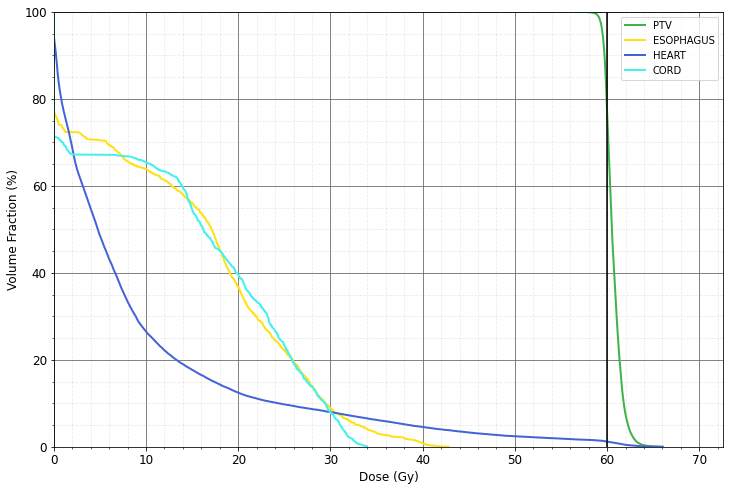

In [8]:
# plot DVH for the structures in the given list. Default dose_1d is in Gy and volume is in relative scale(%).
structs = ['PTV', 'ESOPHAGUS', 'HEART', 'CORD']
my_plan.plot_dvh(sol=sol, structs=structs)
my_plan.plot_dvh(sol=sol_low_dim, structs=structs)
my_plan.plot_dvh(sol=sol_low_dim_only, structs=structs)

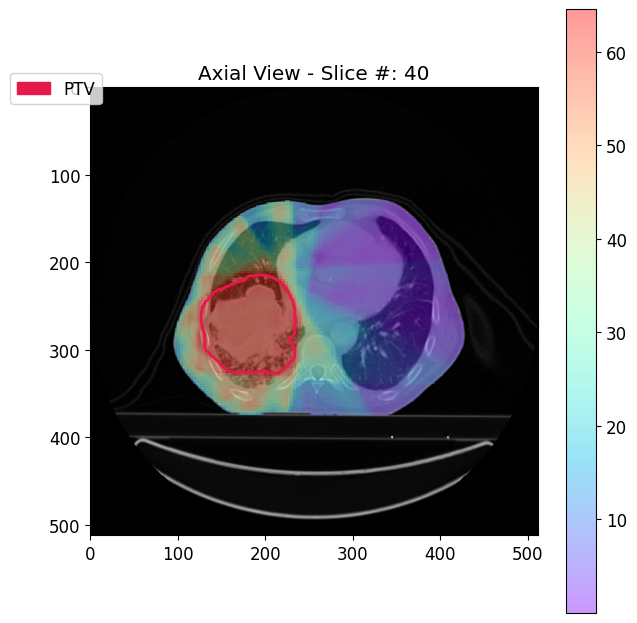

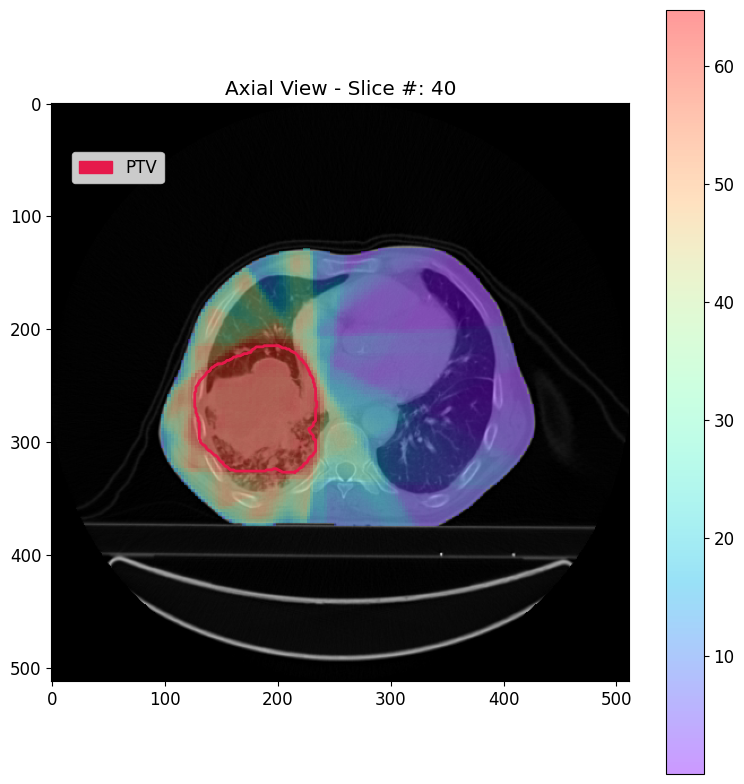

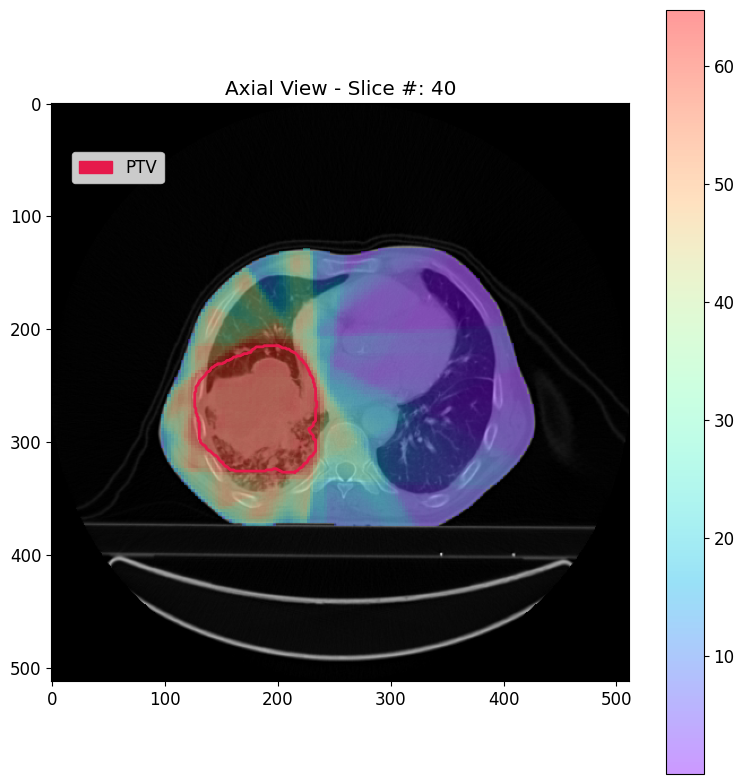

In [9]:
# plot 2d axial slice for the given solution and display the structures contours on the slice
pp.Visualize.plot_2d_dose(my_plan, sol=sol, show_isodose=False, slice_num=40, structs=['PTV'])
pp.Visualize.plot_2d_dose(my_plan, sol=sol_low_dim, show_isodose=False, slice_num=40, structs=['PTV'])
pp.Visualize.plot_2d_dose(my_plan, sol=sol_low_dim_only, show_isodose=False, slice_num=40, structs=['PTV'])

In [10]:
# visualize plan metrics based upon clinical criteria
pp.Visualize.plan_metrics(my_plan, sol=sol)
pp.Visualize.plan_metrics(my_plan, sol=sol_low_dim)
pp.Visualize.plan_metrics(my_plan, sol=sol_low_dim_only)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html
